In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import boto
import pandas as pd
import seaborn as sns
import mpld3
from bokeh import *
from ggplot import *
%matplotlib inline

## Get Data

In [4]:
# %%timeit
# import pickle
# inFile=open('DUMP_stuff.dat','r')
# mentionCounter=pickle.load(inFile)
# hashTagCounter=pickle.load(inFile)
# taggedHashTagCounter=pickle.load(inFile)
# domainCounter=pickle.load(inFile)
# topicCounter=pickle.load(inFile)
# timeCounter=pickle.load(inFile)
# rawDomainCounter=pickle.load(inFile)

1 loops, best of 3: 21 s per loop


In [2]:
# cPickle currently approx 3 times faster than pickle 
import cPickle
inFile=open('DUMP_stuff.dat','r')
mentionCounter=cPickle.load(inFile)
hashTagCounter=cPickle.load(inFile)
domainCounter=cPickle.load(inFile)
topicCounter=cPickle.load(inFile)
timeCounter=cPickle.load(inFile)
rawDomainCounter=cPickle.load(inFile)

In [3]:
mentionCounterFrame = pd.DataFrame(mentionCounter)
hashTagCounterFrame= pd.DataFrame(hashTagCounter)
domainCounterFrame= pd.DataFrame(domainCounter)
topicCounterFrame= pd.DataFrame(topicCounter)
timeCounterFrame= pd.DataFrame(timeCounter)
rawDomainCounterFrame= pd.DataFrame(rawDomainCounter)

In [5]:
mentionCounterFrame.columns = ['Account', 'Number of tweets']
hashTagCounterFrame.columns = ['Hashtag', 'Number of tweets']
domainCounterFrame.columns = ['Domain', 'Number of tweets']
topicCounterFrame.columns = ['Topic', 'Number of tweets']
timeCounterFrame.columns = ['Time', 'Number of tweets']
rawDomainCounterFrame.columns = ['URL', 'Number of tweets']

In [6]:
rawDomainCounterFrame = rawDomainCounterFrame.replace(to_replace='', value=np.nan)
rawDomainCounterFrame = rawDomainCounterFrame.dropna()
#rawDomainCounterFrame = rawDomainCounterFrame[pd.notnull(rawDomainCounterFrame['URL'])]

In [7]:
rawDomainCounterFrame.sort(columns='Number of tweets', ascending=False, inplace=True)

In [8]:
rawDomainCounterFrame.head()

,URL,Number of tweets
1,http://pairsonnalites-br.blogspot.co.uk/2014/0...,2
8,http://pairsonnalites-br.blogspot.co.uk/2014/0...,2
2,http://g1.globo.com/bemestar/noticia/2014/07/i...,2
13,http://pairsonnalites-br.blogspot.co.uk/2014/0...,2
12,http://pairsonnalites-br.blogspot.co.uk/2014/0...,2


# Topics and Categories

In [9]:
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)

In [10]:
sns.set_context("poster")
sns.set_style("darkgrid", {'font.size': 14, 'axes.labelsize': 16, 'legend.fontsize': 14.0, 'axes.titlesize': 12, 'xtick.labelsize': 14, 
    'ytick.labelsize': 14})

## Number of Tweets by Hashtag

/home/ubuntu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


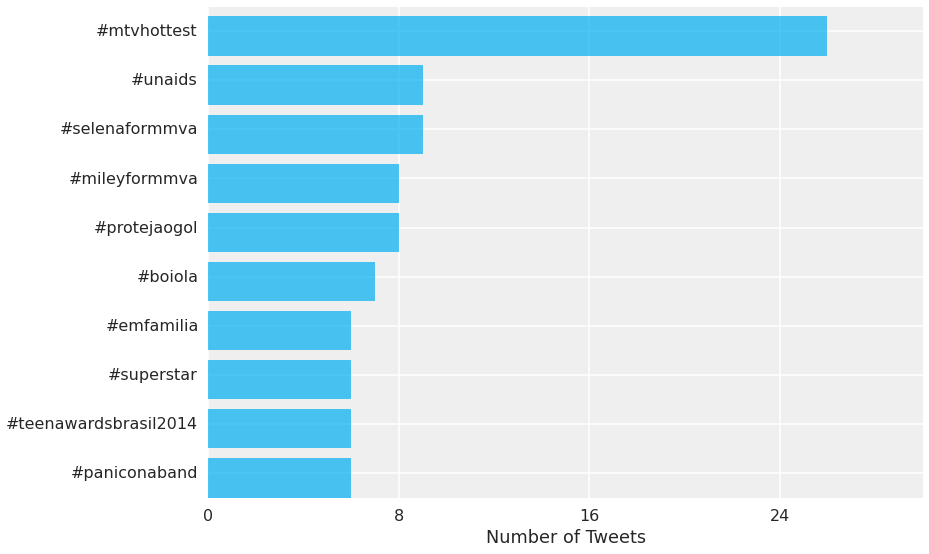

In [11]:
fig, ax = plt.subplots()
hashTagCounter.reverse()
ax.barh(range(10),[v[1] for v in hashTagCounter[-10:]],log=False,linewidth=0,alpha=0.7,color="#00aeef")
ax.set_axis_bgcolor('#efefef')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_yticks([i+0.5 for i in range(10)])
ax.set_xlabel('Number of Tweets')
ax.set_yticklabels(['#'+v[0] for v in hashTagCounter[-10:]]);
plt.savefig('../web/charts/hashtags.png', bbox_inches='tight',dpi=200)

## Number of Tweets by URL

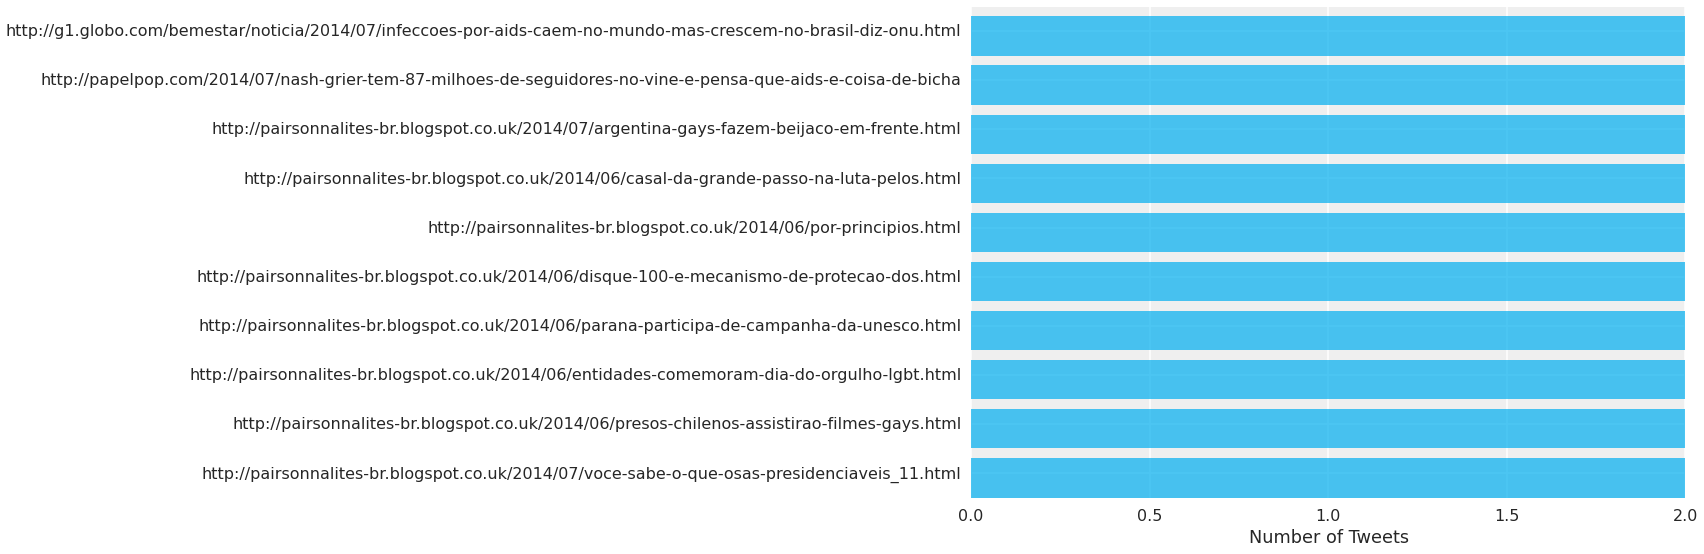

In [14]:
fig, ax = plt.subplots()
rawDomainCounter.reverse()
ax.barh(range(10),[v[1] for v in rawDomainCounter[-12:-2]],log=False,linewidth=0,alpha=0.7,color="#00aeef")
ax.set_axis_bgcolor('#efefef')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_yticks([i+0.5 for i in range(10)])
ax.set_xlabel('Number of Tweets')
ax.set_yticklabels([v[0] for v in rawDomainCounter[-12:-2]]);
plt.savefig('../web/charts/rawdomains.png', bbox_inches='tight',dpi=200)

In [16]:
rawDomainFig, ax = plt.subplots()
rawDomainCounter.reverse()
ax.barh(range(10),[v[1] for v in rawDomainCounter[-12:-2]],log=False,linewidth=0,alpha=0.7,color="#00aeef")
ax.set_axis_bgcolor('#efefef')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_yticks([i+0.5 for i in range(10)])
ax.set_xlabel('Number of Tweets')
ax.set_yticklabels([v[0] for v in rawDomainCounter[-12:-2]]);
plt.savefig('../web/charts/rawdomains.png', bbox_inches='tight',dpi=200)
mpld3.save_html(rawDomainFig, '../charts/rawdomains.php', figid="taggedHashtagsFig")
mpld3.display(rawDomainFig)

## Number of Tweets by Link Domain

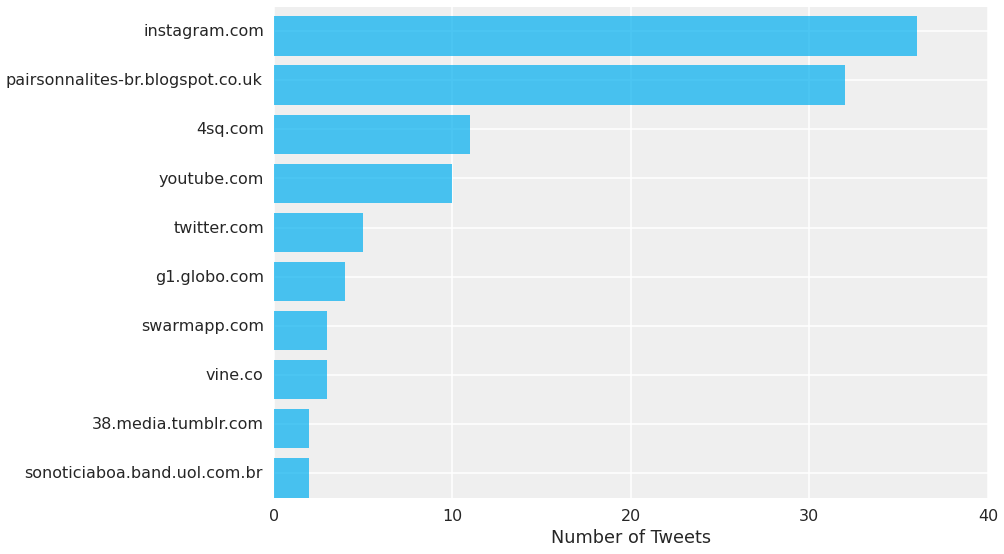

In [17]:
fig, ax = plt.subplots()
domainCounter.reverse()
ax.barh(range(10),[v[1] for v in domainCounter[-10:]],log=False,linewidth=0,alpha=0.7,color="#00aeef")
ax.set_axis_bgcolor('#efefef')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_yticks([i+0.5 for i in range(10)])
ax.set_xlabel('Number of Tweets')
ax.set_yticklabels([v[0] for v in domainCounter[-10:]]);
plt.savefig('../web/charts/domains.png', bbox_inches='tight',dpi=200)

## Number of Tweets by Tagged Topic

In [18]:
topicCounter

[(u'Discrimination', 7471),
 (u'Prevention', 973),
 (u'Campaign', 24),
 (u'Testing', 19)]

In [19]:
len(topicCounter[-10:])
range(9)
[v[1] for v in topicCounter[-10:]]

[7471, 973, 24, 19]

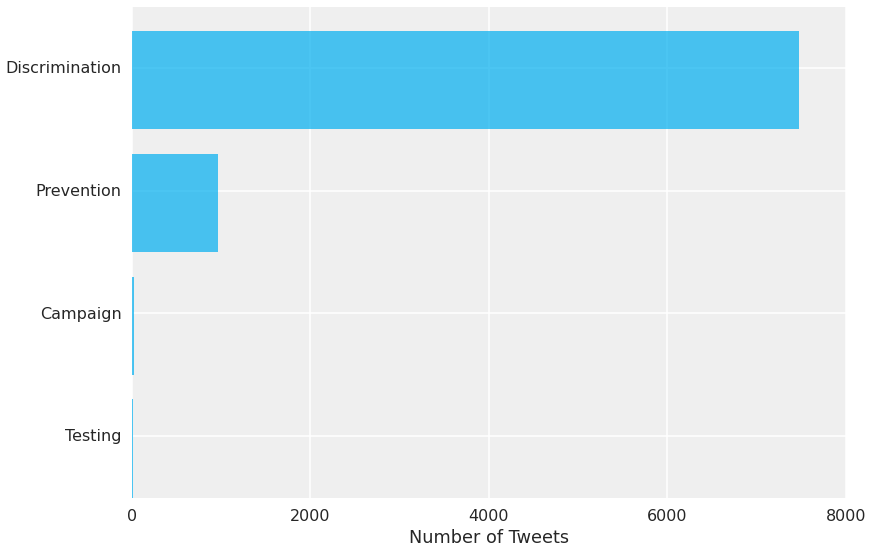

In [30]:
fig, ax = plt.subplots()
topicCounter.reverse()
ax.barh(range(4),[v[1] for v in topicCounter[-4:]],log=False,linewidth=0,alpha=0.7,color="#00aeef")
ax.set_axis_bgcolor('#efefef')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_yticks([i+0.5 for i in range(4)])
ax.set_xlabel('Number of Tweets')
ax.set_yticklabels([v[0] for v in topicCounter[-4:]]);
plt.savefig('../web/charts/topics.png', bbox_inches='tight',dpi=200)

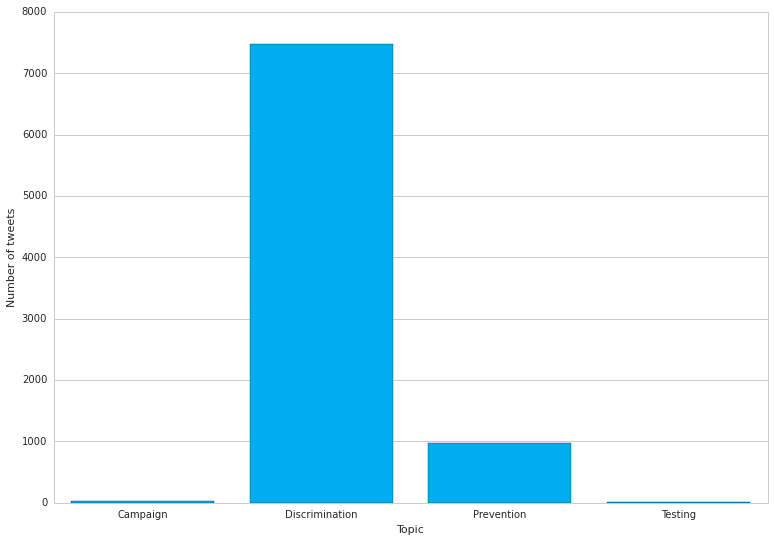

In [32]:
sns.set_context("poster")
sns.despine()
sns.set(style="whitegrid")
sns.barplot(topicCounterFrame["Topic"],topicCounterFrame["Number of tweets"], color="#00aeef")
plt.savefig('../charts/topics_seaborn.png')

/home/ubuntu/anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:53: FutureWarning: rows is deprecated, use index instead
  warnings.warn(msg, FutureWarning)


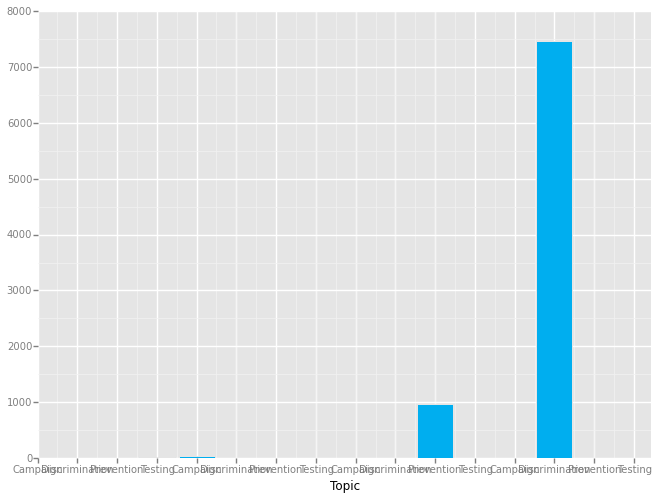

<ggplot: (8739145405121)>

In [33]:
# ggplot
ggplot(aes(x="Topic", weight="Number of tweets"), topicCounterFrame) + geom_bar(fill='#00aeef')

## Number of Tweets by @Mentioned Account

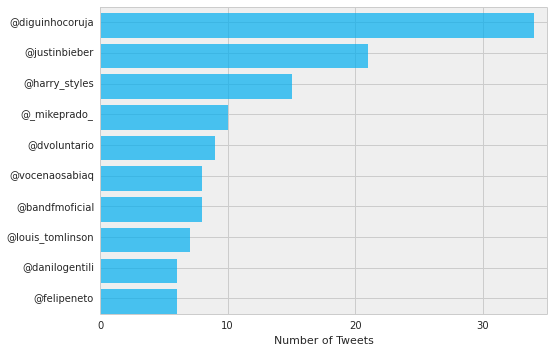

In [34]:
fig, ax = plt.subplots()
mentionCounter.reverse()
ax.barh(range(10),[v[1] for v in mentionCounter[-10:]],log=False,linewidth=0,alpha=0.7,color="#00aeef")
ax.set_axis_bgcolor('#efefef')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_yticks([i+0.5 for i in range(10)])
ax.set_xlabel('Number of Tweets')
ax.set_yticklabels(['@'+v[0] for v in mentionCounter[-10:]]);
plt.savefig('../web/charts/mentions.png', bbox_inches='tight',dpi=200)

In [1]:
from IPython.core.display import HTML
styles = open("../css/custom.css", "r").read()
HTML(styles)